<a href="https://colab.research.google.com/github/mgk0422/python-basic/blob/master/hyper_Parameter_%EB%B0%B0%EC%B6%94_%EC%8B%9C%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

from xgboost import XGBRegressor


import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving 무_시장.xlsx to 무_시장.xlsx
Saving 배추_시장.xlsx to 배추_시장.xlsx
Saving 상추_시장.xlsx to 상추_시장.xlsx
Saving 양파_시장.xlsx to 양파_시장.xlsx
Saving 오이_시장.xlsx to 오이_시장.xlsx


#배추

In [13]:
dataset = pd.read_excel('/content/배추_시장.xlsx')
# dataset = pd.merge(dataset, wholesale, how='left', on='일자' )
# dataset.head()
# dataset = pd.read_excel('/content/무_특_반입_경락_시장_날씨_Holy_유가.xlsx')
# dataset = dataset.drop(['일자','품목명','품목코드','유무','평균 5cm 지중온도(°C)','평균 지면온도(°C)','최고기온(°C)','합계 일조시간(hr)','최저기온(°C)'], axis=1)
# dataset = dataset.drop(['일자', '최대 풍속(m/s)',	'평균 풍속(m/s)',	'평균 상대습도(%)',	'합계 일조시간(hr)',	'평균 지면온도(°C)',	'평균 5cm 지중온도(°C)', '여부'], axis=1)
# dataset = dataset[['도매가격', '100g가격', '유가 전국평균가격', '평균 풍속(m/s)', '여부', '최고기온(°C)', '평균 지면온도(°C)', '평균 5cm 지중온도(°C)', '일강수량(mm)', '반입량']]
# dataset = dataset.drop(['일자','Unnamed: 0'], axis=1)
#dataset = dataset.drop(['일자'], axis=1)
dataset = dataset.dropna()
dataset.head()
# dataset.corr()

,가격,반입량,경락가평균가격,최저기온(°C),최고기온(°C),일강수량(mm),유무,유가 전국평균가격,도매가격
0,4666.666667,605000,10670,1.0,8.9,0.0,0,1501.224706,1000.0
1,4148.571429,662000,9800,-0.1,7.3,0.0,0,1503.653529,1000.0
2,4100.869565,704000,10185,-3.1,4.3,0.0,0,1509.990588,900.0
3,4443.333333,585000,9764,-9.4,1.5,0.0,0,1513.195882,1000.0
4,4110.214286,463000,9805,-6.1,1.0,0.0,1,1514.122941,1000.0


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 0 to 471
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   가격         454 non-null    float64
 1   반입량        454 non-null    int64  
 2   경락가평균가격    454 non-null    int64  
 3   최저기온(°C)   454 non-null    float64
 4   최고기온(°C)   454 non-null    float64
 5   일강수량(mm)   454 non-null    float64
 6   유무         454 non-null    int64  
 7   유가 전국평균가격  454 non-null    float64
 8   도매가격       454 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 35.5 KB


In [15]:
y_target = dataset['가격']
X_data = dataset.drop(['가격'], axis=1, inplace=False)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.15, random_state=140)
print(X_train.shape, X_test.shape)

(385, 8) (69, 8)


In [17]:
# 검증해주는 함수
def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores=cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
  rmse_scores = np.sqrt(-1 * neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  model.fit(X_data, y_target)
  score = model.score(X_data, y_target)
  kf_cv_scores = cross_val_score(model, X_data, y_target)
  print('#### ', model.__class__.__name__, ' ####')
  print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))
  print('score : ', score)
  print("K-fold CV scores : {}" .format(kf_cv_scores))
  print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

## XGBoost Regressor 하이퍼파라미터


In [18]:
# XGBoost Hypter Parameter Tuning
def XGBhyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.03, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror'],
        'gamma' : [0.1, 0.2, 0.3, 0.4],

    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

def RFRhyperParameterTuning(X_train, y_train):
    param_tuning = {
    'bootstrap': [True],
    'max_depth': [3, 5, 7, 10],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
    
    }

    rf_model = RandomForestRegressor()

    gsearch = GridSearchCV(estimator = rf_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

def LGBMhyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.03, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_samples' : [10, 20, 30],
        'subsample' : [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['regression'],
        'gamma' : [0.1, 0.2, 0.3],
        'num_leaves' : [6, 8, 10]

    }

    lgbm = LGBMRegressor()

    gsearch = GridSearchCV(estimator = lgbm,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

def GBRhyperParameterTuning(X_train, y_train):
    
    param_tuning = {
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7, 10],
        'subsample': [0.5, 0.7],
        'n_estimators' : [100, 200, 500]

    }

    gb_model = GradientBoostingRegressor()

    gsearch = GridSearchCV(estimator = gb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [19]:
xgb_parameter = XGBhyperParameterTuning(X_train, y_train)
xgb_parameter

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3164 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4964 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 5184 out of 5184 | elapsed:  5.3min finished


{'colsample_bytree': 0.7,
 'gamma': 0.2,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [20]:
rf_parameter = RFRhyperParameterTuning(X_train, y_train)
rf_parameter

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  6.4min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [21]:
lgbm_parameter = LGBMhyperParameterTuning(X_train, y_train)
lgbm_parameter

Fitting 3 folds for each of 3888 candidates, totalling 11664 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 6300 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 9900 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 11664 out of 11664 | elapsed:  6.6min finished


{'colsample_bytree': 0.7,
 'gamma': 0.1,
 'learning_rate': 0.03,
 'max_depth': 7,
 'min_child_samples': 10,
 'n_estimators': 200,
 'num_leaves': 8,
 'objective': 'regression',
 'subsample': 0.5}

In [26]:

#rf_parameter = RFRhyperParameterTuning(X_train, y_train)
#rf_parameter

gbr_parameter= GBRhyperParameterTuning(X_train, y_train)
gbr_parameter


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   13.9s


KeyboardInterrupt: ignored

In [33]:
# 모델 생성 및 예측
xgb_reg = XGBRegressor(colsample_bytree = 0.7, 
                       gamma = 0.2,
                       learning_rate = 0.1,
                       max_depth = 5,
                       min_child_weight = 1,
                       n_estimators = 500,
                       objective = 'reg:squarederror',
                       subsample = 0.7)

rf_reg = RandomForestRegressor(random_state=0, 
                               bootstrap = [True],
                               max_depth = 10,
                               max_features = 3,
                               min_samples_leaf = 3,
                               min_samples_split = 8,
                               n_estimators = 100
                               )

lgb_reg = LGBMRegressor(colsample_bytree = 0.7,
                        gamma = 0.1,
                        learning_rate = 0.03,
                        max_depth = 7,
                        min_child_samples = 10,
                        n_estimators = 200,
                        num_leaves =8,
                        objective = 'regression',
                        subsample = 0.5)

gb_reg = GradientBoostingRegressor(random_state=0, 
                                   learning_rate=0.1,
                                   max_depth=3,
                                   n_estimators=200,
                                   subsample=0.5
                                   )

models = [lgb_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]

for model in models:
  get_model_cv_prediction(model, X_train, y_train)

####  LGBMRegressor  ####
 5 교차 검증의 평균 RMSE : 645.153 
score :  0.942786966398341
K-fold CV scores : [0.66607126 0.83877351 0.85140573 0.79614464 0.90457473]
K-fold CV average score: 0.81
####  RandomForestRegressor  ####
 5 교차 검증의 평균 RMSE : 667.325 
score :  0.918757351649342
K-fold CV scores : [0.69927035 0.82759531 0.79822221 0.79458127 0.89685184]
K-fold CV average score: 0.80
####  GradientBoostingRegressor  ####
 5 교차 검증의 평균 RMSE : 636.806 
score :  0.985180183173356
K-fold CV scores : [0.6819168  0.79882277 0.86045    0.83641482 0.89525682]
K-fold CV average score: 0.81
####  XGBRegressor  ####
 5 교차 검증의 평균 RMSE : 613.464 
score :  0.9999898262329268
K-fold CV scores : [0.69484862 0.89100682 0.84974864 0.83521015 0.882529  ]
K-fold CV average score: 0.83
####  LGBMRegressor  ####
 5 교차 검증의 평균 RMSE : 645.153 
score :  0.942786966398341
K-fold CV scores : [0.66607126 0.83877351 0.85140573 0.79614464 0.90457473]
K-fold CV average score: 0.81


In [34]:
ypred = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, ypred)

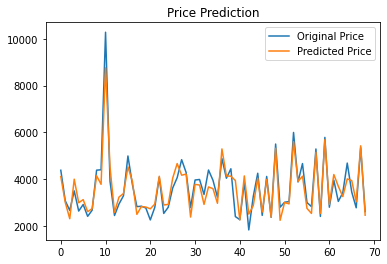

In [35]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original Price")
plt.plot(x_ax, ypred, label="Predicted Price")
plt.title("Price Prediction")
plt.legend()
plt.show()